In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import timedelta
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('sales.csv',encoding = 'unicode_escape',parse_dates=['ORDERDATE'])#pd.set_option('max_row', 3000)

In [3]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [4]:
dfn = df[['CUSTOMERNAME','QUANTITYORDERED','SALES','ORDERDATE']]

In [5]:
dfn.columns =['id','quant','price','date']

In [6]:
dfn.isna().sum()

id       0
quant    0
price    0
date     0
dtype: int64

In [7]:
dfn.shape

(2823, 4)

In [8]:
dfn

,id,quant,price,date
0,Land of Toys Inc.,30,2871.00,2003-02-24
1,Reims Collectables,34,2765.90,2003-05-07
2,Lyon Souveniers,41,3884.34,2003-07-01
3,Toys4GrownUps.com,45,3746.70,2003-08-25
4,Corporate Gift Ideas Co.,49,5205.27,2003-10-10
...,...,...,...,...
2818,Euro Shopping Channel,20,2244.40,2004-12-02
2819,"Oulu Toy Supplies, Inc.",29,3978.51,2005-01-31
2820,Euro Shopping Channel,43,5417.57,2005-03-01
2821,Alpha Cognac,34,2116.16,2005-03-28


# COHORT ANALYSIS

In [9]:
#only the customer that joined at specific business day


In [10]:
#get the range of intial purchases

In [11]:
dfnfirstpurchase = dfn.sort_values(['id','date']).groupby(['id']).first()

In [12]:
dfnfirstpurchase

,quant,price,date
id,,,
"AV Stores, Co.",37,5433.08,2003-03-18
Alpha Cognac,25,3644.75,2003-07-04
Amica Models & Co.,34,8014.82,2004-08-17
"Anna's Decorations, Ltd",23,2702.04,2003-09-11
Atelier graphique,26,3073.72,2003-05-20
...,...,...,...
"Vida Sport, Ltd",27,4517.91,2004-02-22
Vitachrome Inc.,39,4808.31,2003-01-10
"Volvo Model Replicas, Co",29,7209.11,2003-03-24


In [13]:
dfnfirstpurchase['date'].min()

Timestamp('2003-01-06 00:00:00')

In [14]:
dfnfirstpurchase['date'].max()

Timestamp('2004-09-15 00:00:00')

In [15]:
#visualize all purchases with in cohort

In [16]:
dfn.reset_index().set_index(['date'])[['price']].resample(rule='MS').sum()

,price
date,
2003-01-01,129753.60
2003-02-01,140836.19
2003-03-01,174504.90
2003-04-01,201609.55
2003-05-01,192673.11
2003-06-01,168082.56
2003-07-01,187731.88
2003-08-01,197809.30
2003-09-01,263973.36


<AxesSubplot:xlabel='date'>

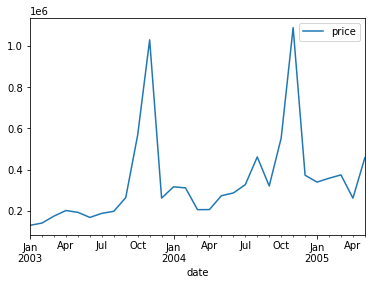

In [17]:
dfn.reset_index().set_index(['date'])[['price']].resample(rule='MS').sum().plot()

AS YOU CAN SEE THERE IS COHORT ANALYSIS THE CUSTOMERS THAT IN SPECIFIC  BUSINESS TIME

In [18]:
#VISUALIZE INDIVIDUAL  CUSTOMER PURCHASES

In [19]:
ids = dfn['id'].unique()

In [20]:
idselected = ids[0:10]

In [21]:
idselected

array(['Land of Toys Inc.', 'Reims Collectables', 'Lyon Souveniers',
       'Toys4GrownUps.com', 'Corporate Gift Ideas Co.',
       'Technics Stores Inc.', 'Daedalus Designs Imports', 'Herkku Gifts',
       'Mini Wheels Co.', 'Auto Canal Petit'], dtype=object)

In [22]:
dfnsubset = dfn[dfn['id'].isin(idselected)].groupby(['id','date']).sum().reset_index()


In [23]:
dfnsubset

,id,date,quant,price
0,Auto Canal Petit,2004-01-15,530,51172.65
1,Auto Canal Petit,2004-05-26,312,27931.21
2,Auto Canal Petit,2005-04-07,159,14066.80
3,Corporate Gift Ideas Co.,2003-10-10,585,62498.29
4,Corporate Gift Ideas Co.,2003-10-18,391,33180.59
5,Corporate Gift Ideas Co.,2005-02-17,317,36495.95
6,Corporate Gift Ideas Co.,2005-02-23,154,17707.67
7,Daedalus Designs Imports,2003-11-11,458,48874.28
8,Daedalus Designs Imports,2004-02-21,241,20178.13
9,Herkku Gifts,2003-11-12,522,60795.84


In [24]:
from plotnine import ggplot, aes, geom_line,geom_point,facet_wrap

In [25]:
import plotnine as pn

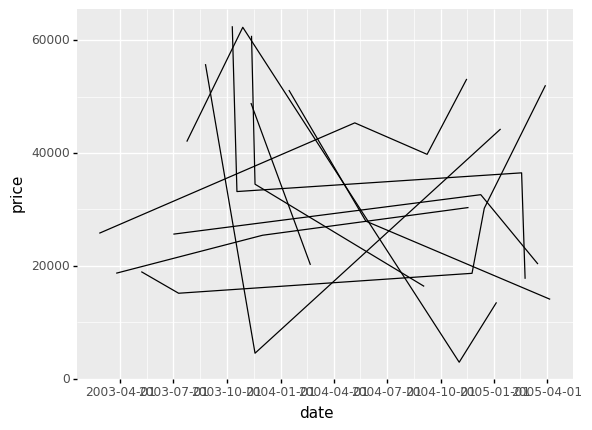

<ggplot: (124017025642)>

In [26]:
pn.ggplot(pn.aes('date','price',group='id'),data=dfnsubset)+geom_line() 

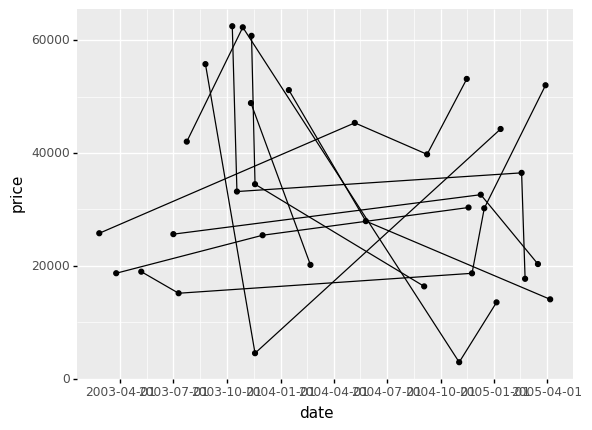

<ggplot: (124015385263)>

In [27]:
pn.ggplot(pn.aes('date','price',group='id'),data=dfnsubset)+geom_line()+ geom_point()

C:\Users\Hp\.conda\envs\hariprakash\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\Hp\.conda\envs\hariprakash\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


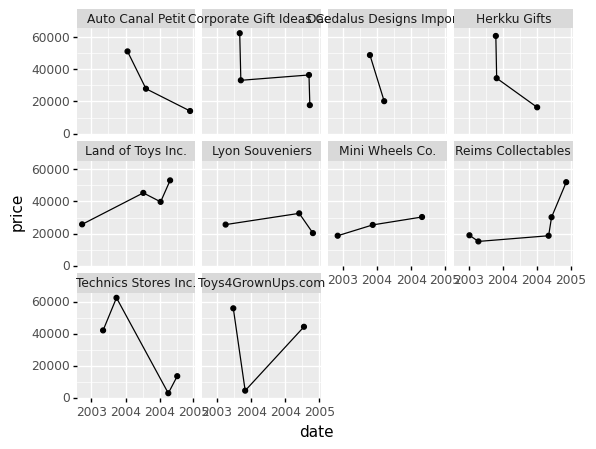

<ggplot: (123886232058)>

In [28]:
pn.ggplot(pn.aes('date','price',group='id'),data=dfnsubset)+geom_line() + geom_point()+pn.facet_wrap('id')+pn.scale_x_date(date_breaks='8 Months',date_labels='%Y')

# MACHINE LEARNING ?

#what is the amount spend by customer in next 90 days

#what is the prob of purchase by a customer in next 90 day s


# TIME SPLITTING

In [29]:
nd = 100
maxdate = max(dfn['date'])

In [30]:
maxdate

Timestamp('2005-05-31 00:00:00')

In [31]:
cutoff =  maxdate - pd.to_timedelta(nd,unit='d')

In [32]:
cutoff

Timestamp('2005-02-20 00:00:00')

In [33]:
indatedfn = dfn[dfn['date']<=cutoff]

In [34]:
outdatefn = dfn[dfn['date']> cutoff]

# FEATURE ENGINEERING(RFM)

In [35]:
#Most challenging part
#2 stage process
# Need to frame the problem
# need to think about what features to include

In [36]:
targetdf = outdatefn.drop(['quant'],axis=1).groupby('id').sum().rename({'price':'spendamount'},axis=1).assign(spendprob=1)

In [37]:
targetdf

,spendamount,spendprob
id,,
Alpha Cognac,15139.12,1
"Anna's Decorations, Ltd",35160.25,1
"Australian Collectables, Ltd",14378.09,1
Auto Canal Petit,14066.80,1
Corporate Gift Ideas Co.,17707.67,1
Danish Wholesale Imports,26012.87,1
Diecast Classics Inc.,6166.80,1
"Dragon Souveniers, Ltd.",4175.60,1
Euro Shopping Channel,236662.30,1


In [38]:
recencydf = indatedfn[['id','date']].groupby(['id']).apply(lambda x: (df['ORDERDATE'].max()-x['date'].max())/pd.to_timedelta(1,'day')).to_frame().set_axis(['recency'],axis=1)

In [39]:
recencydf

,recency
id,
"AV Stores, Co.",195.0
Alpha Cognac,570.0
Amica Models & Co.,264.0
"Anna's Decorations, Ltd",131.0
Atelier graphique,187.0
...,...
"Vida Sport, Ltd",274.0
Vitachrome Inc.,207.0
"Volvo Model Replicas, Co",193.0


In [152]:
frequencydf  = indatedfn[['id','date']].groupby(['id']).count().set_axis(['frequency'],axis=1)

In [153]:
frequencydf

,frequency
id,
"AV Stores, Co.",51
Alpha Cognac,15
Amica Models & Co.,26
"Anna's Decorations, Ltd",36
Atelier graphique,7
...,...
"Vida Sport, Ltd",31
Vitachrome Inc.,25
"Volvo Model Replicas, Co",19


In [154]:
monetarydf   = indatedfn.groupby(['id']).agg({'price':['sum','mean']}).set_axis(['sum','mean'],axis=1)

In [155]:
monetarydf

,sum,mean
id,,
"AV Stores, Co.",157807.81,3094.270784
Alpha Cognac,55349.32,3689.954667
Amica Models & Co.,94117.26,3619.894615
"Anna's Decorations, Ltd",118835.88,3300.996667
Atelier graphique,24179.96,3454.280000
...,...,...
"Vida Sport, Ltd",117713.56,3797.211613
Vitachrome Inc.,88041.26,3521.650400
"Volvo Model Replicas, Co",75754.88,3987.098947


# COMBINING FEATURES

In [156]:
rfmfeatures = pd.concat([recencydf,frequencydf,monetarydf],axis=1)

In [157]:
rfmfeatures

,recency,frequency,sum,mean
id,,,,
"AV Stores, Co.",195.0,51,157807.81,3094.270784
Alpha Cognac,570.0,15,55349.32,3689.954667
Amica Models & Co.,264.0,26,94117.26,3619.894615
"Anna's Decorations, Ltd",131.0,36,118835.88,3300.996667
Atelier graphique,187.0,7,24179.96,3454.280000
...,...,...,...,...
"Vida Sport, Ltd",274.0,31,117713.56,3797.211613
Vitachrome Inc.,207.0,25,88041.26,3521.650400
"Volvo Model Replicas, Co",193.0,19,75754.88,3987.098947


In [158]:
rfmfeatures = pd.concat([recencydf,frequencydf,monetarydf],axis=1).merge(targetdf,left_index=True,right_index=True,how='left').fillna(0)

In [159]:
rfmfeatures

,recency,frequency,sum,mean,spendamount,spendprob
id,,,,,,
"AV Stores, Co.",195.0,51,157807.81,3094.270784,0.00,0.0
Alpha Cognac,570.0,15,55349.32,3689.954667,15139.12,1.0
Amica Models & Co.,264.0,26,94117.26,3619.894615,0.00,0.0
"Anna's Decorations, Ltd",131.0,36,118835.88,3300.996667,35160.25,1.0
Atelier graphique,187.0,7,24179.96,3454.280000,0.00,0.0
...,...,...,...,...,...,...
"Vida Sport, Ltd",274.0,31,117713.56,3797.211613,0.00,0.0
Vitachrome Inc.,207.0,25,88041.26,3521.650400,0.00,0.0
"Volvo Model Replicas, Co",193.0,19,75754.88,3987.098947,0.00,0.0


In [160]:
rfmfeatures[rfmfeatures['spendprob']==1]

,recency,frequency,sum,mean,spendamount,spendprob
id,,,,,,
Alpha Cognac,570.0,15,55349.32,3689.954667,15139.12,1.0
"Anna's Decorations, Ltd",131.0,36,118835.88,3300.996667,35160.25,1.0
"Australian Collectables, Ltd",333.0,18,50213.37,2789.631667,14378.09,1.0
Auto Canal Petit,370.0,24,79103.86,3295.994167,14066.80,1.0
Corporate Gift Ideas Co.,103.0,37,132174.83,3572.292703,17707.67,1.0
Danish Wholesale Imports,202.0,33,119028.73,3606.931212,26012.87,1.0
Diecast Classics Inc.,210.0,29,115971.34,3999.011724,6166.80,1.0
"Dragon Souveniers, Ltd.",300.0,42,168814.08,4019.382857,4175.60,1.0
Euro Shopping Channel,104.0,198,675631.81,3412.281869,236662.30,1.0


In [161]:
import xgboost

In [162]:
from xgboost import XGBClassifier

In [163]:
from xgboost import XGBRegressor


In [164]:
from sklearn.model_selection import GridSearchCV

In [53]:
x= rfmfeatures[['recency','frequency','sum','mean']]

In [54]:
y = rfmfeatures['spendamount']

In [55]:
xlog = np.log(x)

array([[<AxesSubplot:title={'center':'recency'}>,
        <AxesSubplot:title={'center':'frequency'}>],
       [<AxesSubplot:title={'center':'sum'}>,
        <AxesSubplot:title={'center':'mean'}>]], dtype=object)

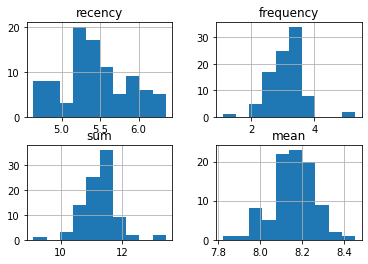

In [56]:
xlog.hist()

In [57]:
xlog

,recency,frequency,sum,mean
id,,,,
"AV Stores, Co.",5.273000,3.931826,11.969133,8.037308
Alpha Cognac,6.345636,2.708050,10.921420,8.213369
Amica Models & Co.,5.575949,3.258097,11.452297,8.194200
"Anna's Decorations, Ltd",4.875197,3.583519,11.685499,8.101980
Atelier graphique,5.231109,1.945910,10.093279,8.147369
...,...,...,...,...
"Vida Sport, Ltd",5.613128,3.433987,11.676009,8.242022
Vitachrome Inc.,5.332719,3.218876,11.385561,8.166685
"Volvo Model Replicas, Co",5.262690,2.944439,11.235258,8.290819


In [58]:
xgb = XGBRegressor(objective = "reg:squarederror",random_state=123)

In [59]:
model = GridSearchCV(estimator=xgb,param_grid= dict(learning_rate=[0.01,0.1,0.3,0.5]),scoring = 'neg_mean_absolute_error',refit=True,cv=5)

In [60]:
model.fit(xlog,y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [61]:
model.best_score_

-12311.274725947944

In [62]:
model.best_params_

{'learning_rate': 0.01}

In [63]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, ...)

In [64]:
predictions = model.predict(xlog)

In [65]:
predictions

array([ 2.9390549e+03,  5.8320845e+03,  6.4140806e+00,  1.0606075e+04,
        2.8157463e+03,  7.3686650e+03,  3.1520576e+01,  6.5224915e+01,
        2.1233364e+03,  8.7825420e+03,  1.9028585e+03, -2.7282183e+00,
        5.8042124e+03, -2.7282183e+00,  2.5366821e+03,  1.9779754e-01,
        1.9779754e-01,  7.0744159e+02, -7.8315701e+00, -2.7282183e+00,
        7.5935211e+00,  1.9779754e-01, -3.5290607e+02,  9.1701582e+03,
        3.1520576e+01,  6.4140806e+00,  1.9779754e-01,  1.6171275e+04,
        2.5223931e+03,  1.9779754e-01,  1.9779754e-01,  2.5223931e+03,
        9.9313788e+02,  8.9076977e+04,  6.9874375e+03,  2.4214578e+04,
        2.1560015e+03,  1.0787560e+04,  5.4044663e+03, -2.7282183e+00,
       -2.7282183e+00, -1.2211096e+00,  2.4125453e+04,  2.4370249e-01,
        1.3634708e+04,  5.1028159e+03,  8.1470835e+03,  4.3952332e+01,
       -2.7282183e+00,  1.9779754e-01,  3.1910542e+03,  5.8320845e+03,
        1.7978131e+04,  2.2513555e+03,  5.0840410e+03,  6.6361508e+04,
      

# CLASSIFICATION

In [66]:

yprob = rfmfeatures['spendprob']

In [67]:
xgbcl= XGBClassifier(objective = 'binary:logistic',random_state=123)

In [68]:
clmodel = GridSearchCV(estimator=xgbcl,param_grid=dict(learning_rate=[0.01,0.1,0.3,0.5]),scoring = 'roc_auc',refit=True,cv=5)

In [69]:
clmodel.fit(x,yprob)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [70]:
clmodel.best_score_

0.7000854700854701

In [71]:
clmodel.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

In [72]:
predictionscl = clmodel.predict_proba(x)

In [73]:
predictionscl

array([[0.960677  , 0.03932299],
       [0.13392073, 0.8660793 ],
       [0.924435  , 0.07556497],
       [0.08841962, 0.9115804 ],
       [0.94573563, 0.05426439],
       [0.01436901, 0.985631  ],
       [0.96839756, 0.03160244],
       [0.93939763, 0.06060236],
       [0.96343184, 0.03656818],
       [0.12988377, 0.87011623],
       [0.9887441 , 0.01125592],
       [0.8895972 , 0.11040284],
       [0.9522235 , 0.04777651],
       [0.99604553, 0.00395446],
       [0.9824274 , 0.0175726 ],
       [0.91574   , 0.08426001],
       [0.9374985 , 0.06250148],
       [0.9691743 , 0.0308257 ],
       [0.9930875 , 0.00691254],
       [0.9959032 , 0.00409679],
       [0.93972117, 0.06027886],
       [0.9935044 , 0.0064956 ],
       [0.9811813 , 0.01881869],
       [0.0527097 , 0.9472903 ],
       [0.98628247, 0.01371755],
       [0.9559842 , 0.04401583],
       [0.99415374, 0.00584627],
       [0.10276097, 0.897239  ],
       [0.21380305, 0.78619695],
       [0.93902457, 0.06097544],
       [0.

# FEATURE IMPORTANCE GLOBAL

In [74]:
spendamount = model.best_estimator_.get_booster().get_score(importance_type='gain')

In [75]:
spendamountdf = pd.DataFrame(data={'feature':list(spendamount.keys()),'values':list(spendamount.values())})

In [76]:
spendamountdf

,feature,values
0,recency,6.282636e+08
1,frequency,6.756292e+09
2,sum,3.356249e+08
3,mean,2.941655e+08


In [78]:
import plydata.cat_tools as cat

In [79]:
spendamountdf.assign(feature=lambda x:cat.cat_reorder(x['feature'],x['values']))

,feature,values
0,recency,6.282636e+08
1,frequency,6.756292e+09
2,sum,3.356249e+08
3,mean,2.941655e+08


In [80]:
spendprob = clmodel.best_estimator_.get_booster().get_score(importance_type='gain')

In [81]:
spendprobdf = pd.DataFrame(data={'feature':list(spendprob.keys()),'values':list(spendprob.values())})

In [82]:
spendprobdf.assign(feature=lambda x:cat.cat_reorder(x['feature'],x['values']))

,feature,values
0,recency,0.563198
1,frequency,0.508196
2,sum,0.370494
3,mean,0.233491


In [83]:
spendamountdf.assign(feature=lambda x:cat.cat_reorder(x['feature'],x['values']))

,feature,values
0,recency,6.282636e+08
1,frequency,6.756292e+09
2,sum,3.356249e+08
3,mean,2.941655e+08


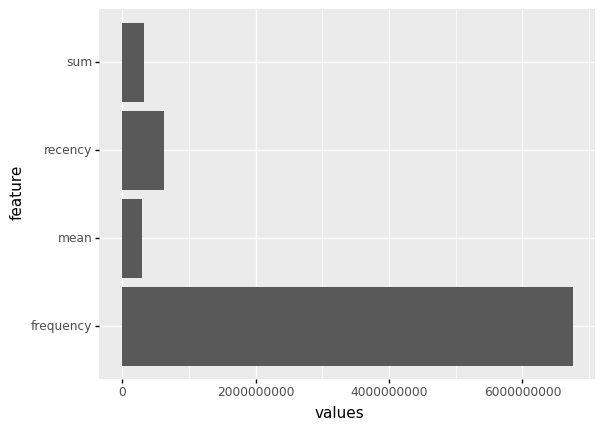

<ggplot: (103875766285)>

In [84]:
pn.ggplot(pn.aes('feature','values'),data=spendamountdf)+pn.geom_col()+pn.coord_flip()

In [85]:
spendamountdf.assign(feature=lambda x:cat.cat_reorder(x['feature'],x['values']))

,feature,values
0,recency,6.282636e+08
1,frequency,6.756292e+09
2,sum,3.356249e+08
3,mean,2.941655e+08


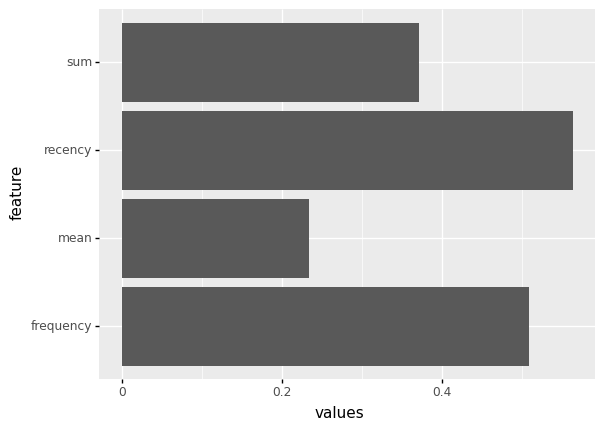

<ggplot: (103875832028)>

In [86]:
pn.ggplot(pn.aes('feature','values'),data=spendprobdf)+pn.geom_col()+pn.coord_flip()

In [87]:
finaldf = pd.concat([pd.DataFrame(predictions).set_axis(['predsreg'],axis=1),pd.DataFrame(predictionscl)[[1]].set_axis(['predcl'],axis=1),rfmfeatures.reset_index()],axis=1)

In [88]:
finaldf

,predsreg,predcl,id,recency,frequency,sum,mean,spendamount,spendprob
0,2939.054932,0.039323,"AV Stores, Co.",195.0,51,157807.81,3094.270784,0.00,0.0
1,5832.084473,0.866079,Alpha Cognac,570.0,15,55349.32,3689.954667,15139.12,1.0
2,6.414081,0.075565,Amica Models & Co.,264.0,26,94117.26,3619.894615,0.00,0.0
3,10606.075195,0.911580,"Anna's Decorations, Ltd",131.0,36,118835.88,3300.996667,35160.25,1.0
4,2815.746338,0.054264,Atelier graphique,187.0,7,24179.96,3454.280000,0.00,0.0
...,...,...,...,...,...,...,...,...,...
87,-2.728218,0.060983,"Vida Sport, Ltd",274.0,31,117713.56,3797.211613,0.00,0.0
88,1852.227661,0.010973,Vitachrome Inc.,207.0,25,88041.26,3521.650400,0.00,0.0
89,-2.728218,0.005114,"Volvo Model Replicas, Co",193.0,19,75754.88,3987.098947,0.00,0.0
90,0.197798,0.035443,West Coast Collectables Co.,488.0,13,46084.64,3544.972308,0.00,0.0


In [89]:
finaldf[['predsreg','predcl','spendamount','spendprob']]

,predsreg,predcl,spendamount,spendprob
0,2939.054932,0.039323,0.00,0.0
1,5832.084473,0.866079,15139.12,1.0
2,6.414081,0.075565,0.00,0.0
3,10606.075195,0.911580,35160.25,1.0
4,2815.746338,0.054264,0.00,0.0
...,...,...,...,...
87,-2.728218,0.060983,0.00,0.0
88,1852.227661,0.010973,0.00,0.0
89,-2.728218,0.005114,0.00,0.0
90,0.197798,0.035443,0.00,0.0


In [93]:
rfmfeatures

,recency,frequency,sum,mean,spendamount,spendprob
id,,,,,,
"AV Stores, Co.",195.0,51,157807.81,3094.270784,0.00,0.0
Alpha Cognac,570.0,15,55349.32,3689.954667,15139.12,1.0
Amica Models & Co.,264.0,26,94117.26,3619.894615,0.00,0.0
"Anna's Decorations, Ltd",131.0,36,118835.88,3300.996667,35160.25,1.0
Atelier graphique,187.0,7,24179.96,3454.280000,0.00,0.0
...,...,...,...,...,...,...
"Vida Sport, Ltd",274.0,31,117713.56,3797.211613,0.00,0.0
Vitachrome Inc.,207.0,25,88041.26,3521.650400,0.00,0.0
"Volvo Model Replicas, Co",193.0,19,75754.88,3987.098947,0.00,0.0


In [52]:
dfrfm = df.groupby('CUSTOMERNAME')['ORDERNUMBER'].nunique()

In [53]:
dfrfm

CUSTOMERNAME
AV Stores, Co.                 3
Alpha Cognac                   3
Amica Models & Co.             2
Anna's Decorations, Ltd        4
Atelier graphique              3
                              ..
Vida Sport, Ltd                2
Vitachrome Inc.                3
Volvo Model Replicas, Co       4
West Coast Collectables Co.    2
giftsbymail.co.uk              2
Name: ORDERNUMBER, Length: 92, dtype: int64

In [55]:
rfmfeatures['recency']= dfrfm

NameError: name 'rfmfeatures' is not defined

In [109]:
rfmfeatures

,recency,frequency,sum,mean,spendamount,spendprob
id,,,,,,
"AV Stores, Co.",3,51,157807.81,3094.270784,0.00,0.0
Alpha Cognac,3,15,55349.32,3689.954667,15139.12,1.0
Amica Models & Co.,2,26,94117.26,3619.894615,0.00,0.0
"Anna's Decorations, Ltd",4,36,118835.88,3300.996667,35160.25,1.0
Atelier graphique,3,7,24179.96,3454.280000,0.00,0.0
...,...,...,...,...,...,...
"Vida Sport, Ltd",2,31,117713.56,3797.211613,0.00,0.0
Vitachrome Inc.,3,25,88041.26,3521.650400,0.00,0.0
"Volvo Model Replicas, Co",4,19,75754.88,3987.098947,0.00,0.0


In [147]:
dfn

,id,quant,price,date
0,Land of Toys Inc.,30,2871.00,2003-02-24
1,Reims Collectables,34,2765.90,2003-05-07
2,Lyon Souveniers,41,3884.34,2003-07-01
3,Toys4GrownUps.com,45,3746.70,2003-08-25
4,Corporate Gift Ideas Co.,49,5205.27,2003-10-10
...,...,...,...,...
2818,Euro Shopping Channel,20,2244.40,2004-12-02
2819,"Oulu Toy Supplies, Inc.",29,3978.51,2005-01-31
2820,Euro Shopping Channel,43,5417.57,2005-03-01
2821,Alpha Cognac,34,2116.16,2005-03-28


In [40]:
recencynew = dfn[['id','date']].groupby(['id']).apply(lambda x: (df['ORDERDATE'].max()-x['date'].max())/pd.to_timedelta(1,'day')).to_frame().set_axis(['recency'],axis=1)

In [41]:
monetarydfnew   = dfn.groupby(['id']).agg({'price':['sum','mean']}).set_axis(['sum','mean'],axis=1)

In [42]:
RFM = pd.concat([recencynew,monetarydfnew],axis=1)

In [43]:
RFM

,recency,sum,mean
id,,,
"AV Stores, Co.",195.0,157807.81,3094.270784
Alpha Cognac,64.0,70488.44,3524.422000
Amica Models & Co.,264.0,94117.26,3619.894615
"Anna's Decorations, Ltd",83.0,153996.13,3347.741957
Atelier graphique,187.0,24179.96,3454.280000
...,...,...,...
"Vida Sport, Ltd",274.0,117713.56,3797.211613
Vitachrome Inc.,207.0,88041.26,3521.650400
"Volvo Model Replicas, Co",193.0,75754.88,3987.098947


In [56]:
RFM['freq'] = dfrfm

In [57]:
RFM

,recency,sum,mean,freq
id,,,,
"AV Stores, Co.",195.0,157807.81,3094.270784,3
Alpha Cognac,64.0,70488.44,3524.422000,3
Amica Models & Co.,264.0,94117.26,3619.894615,2
"Anna's Decorations, Ltd",83.0,153996.13,3347.741957,4
Atelier graphique,187.0,24179.96,3454.280000,3
...,...,...,...,...
"Vida Sport, Ltd",274.0,117713.56,3797.211613,2
Vitachrome Inc.,207.0,88041.26,3521.650400,3
"Volvo Model Replicas, Co",193.0,75754.88,3987.098947,4


In [58]:
RFM = RFM[['freq','recency','sum','mean']]

In [59]:
RFM

,freq,recency,sum,mean
id,,,,
"AV Stores, Co.",3,195.0,157807.81,3094.270784
Alpha Cognac,3,64.0,70488.44,3524.422000
Amica Models & Co.,2,264.0,94117.26,3619.894615
"Anna's Decorations, Ltd",4,83.0,153996.13,3347.741957
Atelier graphique,3,187.0,24179.96,3454.280000
...,...,...,...,...
"Vida Sport, Ltd",2,274.0,117713.56,3797.211613
Vitachrome Inc.,3,207.0,88041.26,3521.650400
"Volvo Model Replicas, Co",4,193.0,75754.88,3987.098947


array([[<AxesSubplot:title={'center':'freq'}>,
        <AxesSubplot:title={'center':'recency'}>],
       [<AxesSubplot:title={'center':'sum'}>,
        <AxesSubplot:title={'center':'mean'}>]], dtype=object)

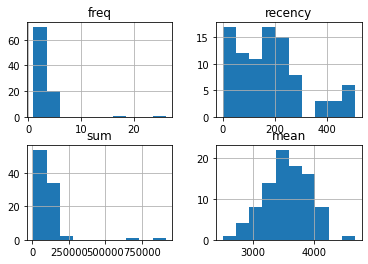

In [60]:
RFM.hist()

<AxesSubplot:>

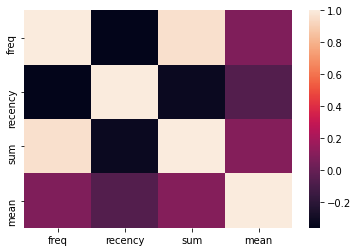

In [61]:
sns.heatmap(RFM.corr())

array([[<AxesSubplot:title={'center':'freq'}>,
        <AxesSubplot:title={'center':'recency'}>],
       [<AxesSubplot:title={'center':'sum'}>,
        <AxesSubplot:title={'center':'mean'}>]], dtype=object)

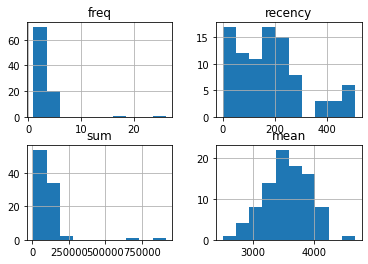

In [62]:
RFM.hist()

In [63]:
RFM

,freq,recency,sum,mean
id,,,,
"AV Stores, Co.",3,195.0,157807.81,3094.270784
Alpha Cognac,3,64.0,70488.44,3524.422000
Amica Models & Co.,2,264.0,94117.26,3619.894615
"Anna's Decorations, Ltd",4,83.0,153996.13,3347.741957
Atelier graphique,3,187.0,24179.96,3454.280000
...,...,...,...,...
"Vida Sport, Ltd",2,274.0,117713.56,3797.211613
Vitachrome Inc.,3,207.0,88041.26,3521.650400
"Volvo Model Replicas, Co",4,193.0,75754.88,3987.098947


In [65]:
p_rec = ggplot(RFM, aes(x = recency, fill = km_clusters)) + 
  geom_density(position = "fill") + ggtitle("Recency")
p_fre = ggplot(RFM, aes(x = as.factor(frequency), fill = km_clusters)) + 
  geom_bar(position = "fill") +ggtitle("Frequency")
p_mon = ggplot(RFM, aes(x = monetary, fill = km_clusters)) + 
  geom_density(position = "fill") + ggtitle("Monetary Value")

SyntaxError: invalid syntax (Temp/ipykernel_16272/954696668.py, line 1)

In [73]:
pn.ggplot(RFM, aes(x = recency , fill = km_clusters))

NameError: name 'recency' is not defined